# Análise Experimento 1

In [46]:
import pandas as pd

caminho_csv = './resultados_experimento1MOCADO.csv'

df = pd.read_csv(caminho_csv)

df.head()

,pop_size,geracoes,elite_rate,mutation_rate,melhor_solucao,melhor_custo,tempo_execucao_s,geracao_melhor_custo,configuracao,elitism,selection,crossover,mutation
0,100,100,0.2,0.1,[8 1 3 5 6 4 9 0 7 2],5131.0,1.581984,96,"{'selection': 'tournament', 'crossover': 'cx',...",simple,tournament,cx,swap
1,100,100,0.2,0.1,[9 0 4 5 6 3 1 7 2 8],5081.0,1.961101,12,"{'selection': 'roulette', 'crossover': 'cx', '...",simple,roulette,cx,swap
2,100,100,0.2,0.1,[2 6 5 3 9 0 8 1 7 4],5648.0,1.526850,6,"{'selection': 'tournament', 'crossover': 'cx',...",simple,tournament,cx,swap
3,100,100,0.2,0.1,[7 4 6 8 3 5 1 9 2 0],5707.0,1.948874,8,"{'selection': 'roulette', 'crossover': 'cx', '...",simple,roulette,cx,swap
4,100,100,0.2,0.1,[0 1 6 3 5 9 8 4 7 2],6188.0,1.493631,23,"{'selection': 'tournament', 'crossover': 'cx',...",simple,tournament,cx,swap


In [47]:
import ast

# Converte a string da coluna 'configuracao' para dicionário e expande em colunas
config_df = df['configuracao'].apply(lambda x: ast.literal_eval(x)).apply(pd.Series)

# Renomeia as colunas, se necessário
config_df.rename(columns={'selection': 'selection_type', 'crossover': 'crossover_type', 'mutation': 'mutation_type'}, inplace=True)

# Concatena o DataFrame original com as novas colunas
df_expanded = pd.concat([df.drop(columns=['configuracao']), config_df], axis=1)

In [48]:
df_expanded.head()

,pop_size,geracoes,elite_rate,mutation_rate,melhor_solucao,melhor_custo,tempo_execucao_s,geracao_melhor_custo,elitism,selection,crossover,mutation,selection_type,crossover_type,elitism,mutation_type
0,100,100,0.2,0.1,[8 1 3 5 6 4 9 0 7 2],5131.0,1.581984,96,simple,tournament,cx,swap,tournament,cx,simple,swap
1,100,100,0.2,0.1,[9 0 4 5 6 3 1 7 2 8],5081.0,1.961101,12,simple,roulette,cx,swap,roulette,cx,simple,swap
2,100,100,0.2,0.1,[2 6 5 3 9 0 8 1 7 4],5648.0,1.526850,6,simple,tournament,cx,swap,tournament,cx,simple,swap
3,100,100,0.2,0.1,[7 4 6 8 3 5 1 9 2 0],5707.0,1.948874,8,simple,roulette,cx,swap,roulette,cx,simple,swap
4,100,100,0.2,0.1,[0 1 6 3 5 9 8 4 7 2],6188.0,1.493631,23,simple,tournament,cx,swap,tournament,cx,simple,swap


In [49]:
fitness_means = df_expanded.groupby('selection_type')['melhor_custo'].mean().reset_index(name='mean_fitness')
fitness_stds = df_expanded.groupby('selection_type')['melhor_custo'].std().reset_index(name='std_fitness')
time_means = df_expanded.groupby('selection_type')['tempo_execucao_s'].mean().reset_index(name='mean_execution_time')
geracao_means = df_expanded.groupby('selection_type')['geracao_melhor_custo'].mean().reset_index(name='mean_generation_best_cost')

# Juntando tudo em um único DataFrame
analysis_summary = fitness_means.merge(fitness_stds, on='selection_type') \
                                .merge(time_means, on='selection_type') \
                                .merge(geracao_means, on='selection_type')

analysis_summary


,selection_type,mean_fitness,std_fitness,mean_execution_time,mean_generation_best_cost
0,roulette,5607.10,807.029700,1.995157,35.10
1,tournament,5616.05,815.683277,1.526642,27.45


## Análise do Custo Médio

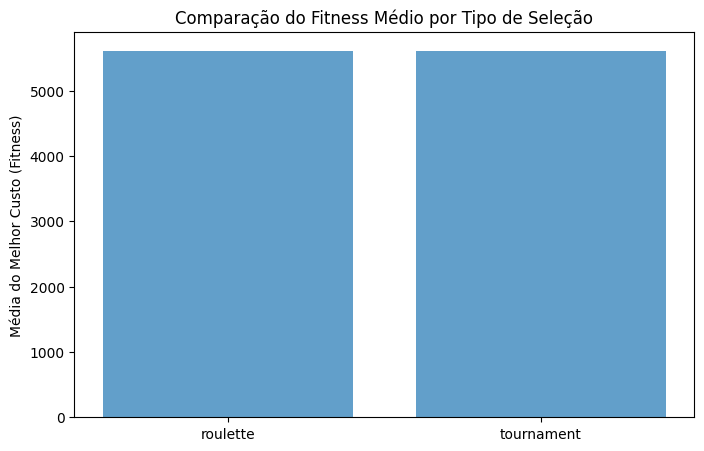

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['selection_type'], analysis_summary['mean_fitness'], alpha=0.7)
plt.ylabel('Média do Melhor Custo (Fitness)')
plt.title('Comparação do Fitness Médio por Tipo de Seleção')
plt.show()



## Análise de Tempo Médio de Execução

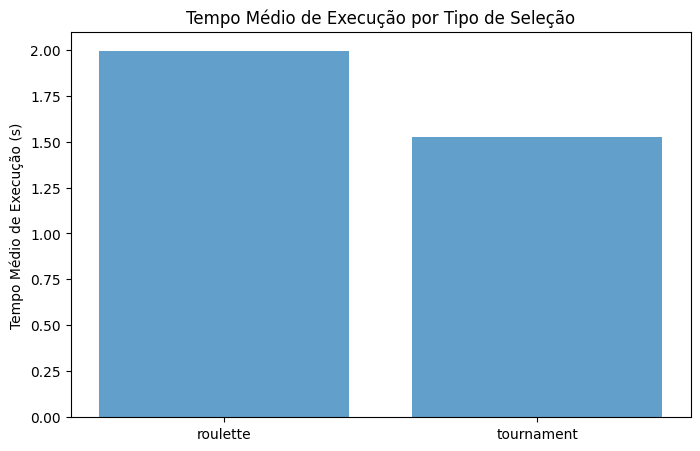

In [51]:
plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['selection_type'], analysis_summary['mean_execution_time'], alpha=0.7)
plt.ylabel('Tempo Médio de Execução (s)')
plt.title('Tempo Médio de Execução por Tipo de Seleção')
plt.show()


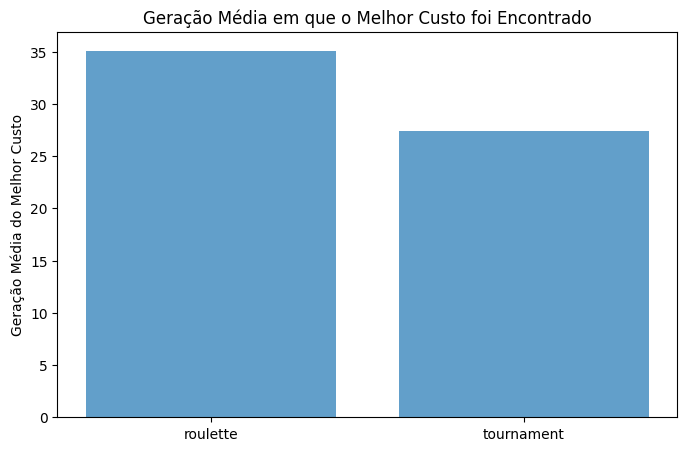

In [52]:
plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['selection_type'], analysis_summary['mean_generation_best_cost'], alpha=0.7)
plt.ylabel('Geração Média do Melhor Custo')
plt.title('Geração Média em que o Melhor Custo foi Encontrado')
plt.show()


In [53]:
import pandas as pd

# Criar um DataFrame para armazenar os resultados da comparação, considerando empates corretamente
comparisons = []

#  Iterar em pares (tournament vs roulette) e considerar empates
for i in range(0, len(df), 2):
    row1 = df.iloc[i]
    row2 = df.iloc[i + 1]

    #  Comparação do melhor custo (fitness)
    if row1['melhor_custo'] < row2['melhor_custo']:
        melhor_custo_vencedor = row1['selection']
    elif row1['melhor_custo'] > row2['melhor_custo']:
        melhor_custo_vencedor = row2['selection']
    else:
        melhor_custo_vencedor = 'empate'

    #  Comparação do tempo (geração do melhor custo)
    if row1['geracao_melhor_custo'] < row2['geracao_melhor_custo']:
        geracao_vencedor = row1['selection']
    elif row1['geracao_melhor_custo'] > row2['geracao_melhor_custo']:
        geracao_vencedor = row2['selection']
    else:
        geracao_vencedor = 'empate'

    comparisons.append({
        'par': i // 2 + 1,
        'melhor_custo_vencedor': melhor_custo_vencedor,
        'geracao_vencedor': geracao_vencedor
    })

# Transformar os resultados em DataFrame
comparison_df = pd.DataFrame(comparisons)

# Contagem de vitórias e empates em cada categoria
melhor_custo_counts = comparison_df['melhor_custo_vencedor'].value_counts().reset_index()
melhor_custo_counts.columns = ['resultado', 'vezes_melhor_custo']

geracao_counts = comparison_df['geracao_vencedor'].value_counts().reset_index()
geracao_counts.columns = ['resultado', 'vezes_mais_rapido']

#  Unir os resultados em uma tabela final
final_comparison = pd.merge(melhor_custo_counts, geracao_counts, on='resultado', how='outer').fillna(0)

final_comparison

,resultado,vezes_melhor_custo,vezes_mais_rapido
0,empate,5,0.0
1,roulette,8,6.0
2,tournament,7,14.0


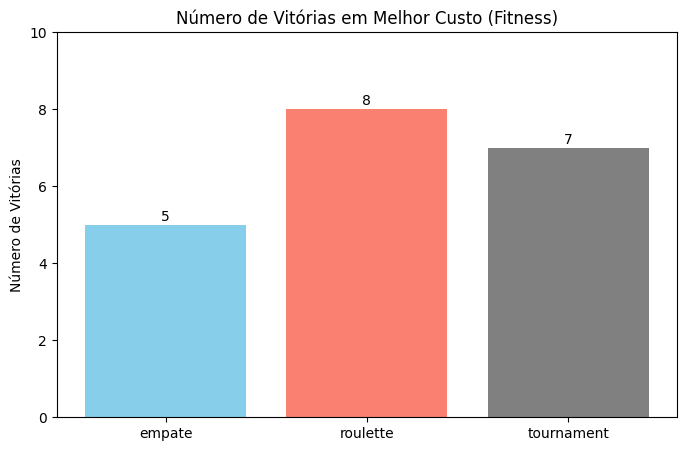

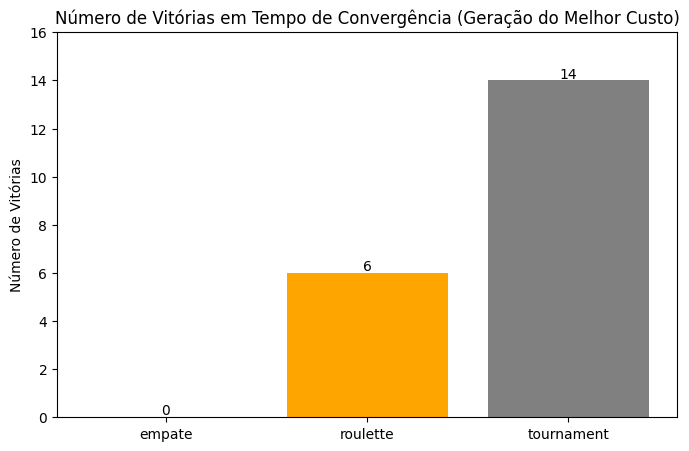

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


# Gráfico de barras: Número de vitórias em Melhor Custo
plt.figure(figsize=(8, 5))
plt.bar(final_comparison['resultado'], final_comparison['vezes_melhor_custo'], color=['skyblue', 'salmon', 'gray'])
plt.ylabel('Número de Vitórias')
plt.title('Número de Vitórias em Melhor Custo (Fitness)')
plt.ylim(0, final_comparison[['vezes_melhor_custo']].values.max() + 2)
for index, value in enumerate(final_comparison['vezes_melhor_custo']):
    plt.text(index, value + 0.1, str(int(value)), ha='center')
plt.show()

#  Gráfico de barras: Número de vitórias em Tempo de Convergência
plt.figure(figsize=(8, 5))
plt.bar(final_comparison['resultado'], final_comparison['vezes_mais_rapido'], color=['lightgreen', 'orange', 'gray'])
plt.ylabel('Número de Vitórias')
plt.title('Número de Vitórias em Tempo de Convergência (Geração do Melhor Custo)')
plt.ylim(0, final_comparison[['vezes_mais_rapido']].values.max() + 2)
for index, value in enumerate(final_comparison['vezes_mais_rapido']):
    plt.text(index, value + 0.1, str(int(value)), ha='center')
plt.show()


plt.show()
